In [1]:
!gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 22.7MB/s]


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


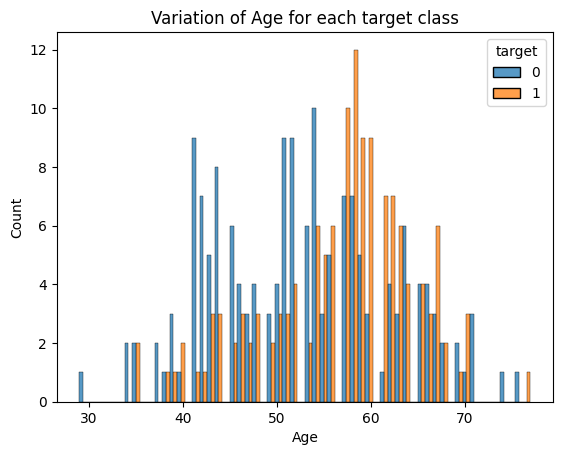

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Fill missing target values with mode (most frequent value)
df['target'] = df['target'].fillna(df['target'].mode()[0])

# Create side-by-side histogram (multiple="dodge" with separate bars for each class)
sns.histplot(data=df, x='age', hue='target', multiple='dodge', bins=60, kde=False)

# Titles and labels for the plot
plt.title('Variation of Age for each target class')
plt.xlabel('Age')
plt.ylabel('Count')

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


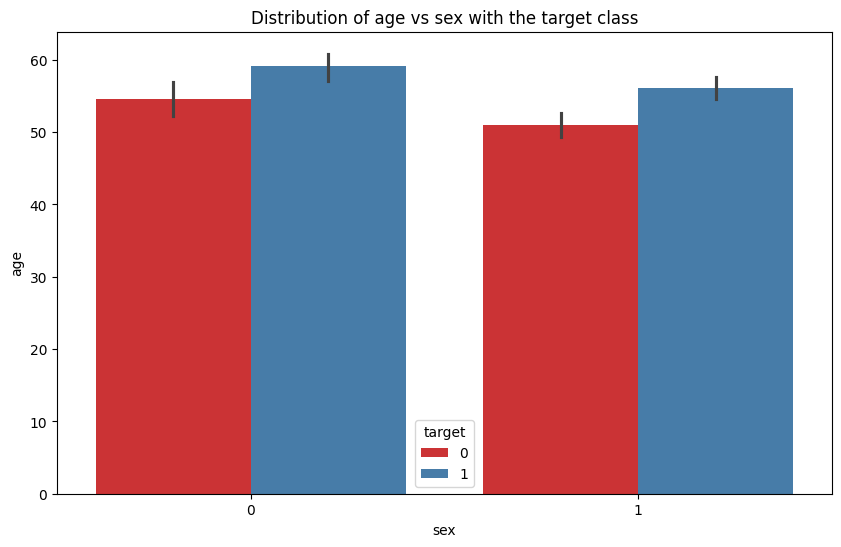

In [4]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Vẽ biểu đồ thể hiện mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim
plt.figure(figsize=(10, 6))  # Thiết lập kích thước khung vẽ
sns.barplot(data=df, x='sex', y='age', hue='target', palette='Set1')
plt.title('Distribution of age vs sex with the target class')  # Thêm tiêu đề cho biểu đồ
plt.xlabel('sex')  # Thêm nhãn trục x
plt.ylabel('age')  # Thêm nhãn trục y
plt.show()  # Hiển thị biểu đồ


In [6]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                           leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [7]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [8]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [9]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [11]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2,
                            n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [12]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình AdaBoost
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for AdaBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoost = {}'.format(accuracy_for_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


In [13]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Gradient Boosting
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0,
                                min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Tính confusion matrix cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print('Accuracy for training set for Gradient Boost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Gradient Boost = {}'.format(accuracy_for_test))


Accuracy for training set for Gradient Boost = 1.0
Accuracy for test set for Gradient Boost = 0.85


In [16]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình XGBoost
xgb = XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# In kết quả độ chính xác
print(f'Accuracy for training set for XGBoost = {accuracy_train:.2f}')
print(f'Accuracy for test set for XGBoost = {accuracy_test:.2f}')




Accuracy for training set for XGBoost = 1.00
Accuracy for test set for XGBoost = 0.87


In [18]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv('cleveland.csv', header=None)

# Đặt tên cột cho dữ liệu
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Chuẩn hóa cột 'target', ánh xạ các giá trị 2, 3, 4 về 1 (bị bệnh) và 0 (không bị bệnh)
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Xử lý dữ liệu thiếu
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Phân chia dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Các đặc trưng
y = df.iloc[:, -1].values  # Nhãn 'target'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình base learners
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42, probability=True)
ad = AdaBoostClassifier(random_state=42)

# Khởi tạo mô hình stacking
estimators = [
    ('decision_tree', dtc),
    ('random_forest', rfc),
    ('knn', knn),
    ('xgboost', xgb),
    ('gradient_boosting', gc),
    ('svc', svc),
    ('adaboost', ad)
]

# Mô hình meta-classifier (mô hình cuối cùng)
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), cv=5)

# Huấn luyện mô hình Stacking
stacking_clf.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả độ chính xác
print(f'Accuracy for training set for Stacking = {accuracy_for_train:.2f}')
print(f'Accuracy for test set for Stacking = {accuracy_for_test:.2f}')

# Tính và in confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix for training set:\n", cm_train)
print("Confusion matrix for test set:\n", cm_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 0.99
Accuracy for test set for Stacking = 0.89
Confusion matrix for training set:
 [[134   1]
 [  2 105]]
Confusion matrix for test set:
 [[27  2]
 [ 5 27]]
